# Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = wX + b$

This is the equation for a line that you studied in high school. w is the slope of the line and b is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of w and b, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the b term? It is included within the X matrix.


**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:



#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + b(1)$



The bias term can further be incorporated into the quation as an additional weight with cofficient 1

#$y= w_1x_1 + w_2x_2 + ......+w_nx_n + w_0(1)$

- Y is the predicted value ($h_w(x)$)
- w₀ is the bias term.
- w₁,…,wₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:


#$L(y,t)=\frac{1}{2}\ (y-t)^2$

Here t is the actual value and y is the predicted value. 
For the simplest case lets assume a straight line with folowing equation Lets substitute the value of y from $y = wx + b$:

#$J=\frac{1}{2N}[\sum_{i=1}^N((wx^{(i)}+b)-t^{(i)})^2]$

Partial Derivative of the above equation with respect to w is shown here:


#$\frac{{\partial J}}{\partial w}=\frac{1}{2N}[\sum_{i=0}^N2((wx^{(i)}+b
)-t^{(i)})(x^{(i)})]$

#$\frac{{\partial J}}{\partial w}=\frac{1}{N}[\sum_{i=0}^Nx^{(i)}(y^{(i)}-t^{(i)})]$

While the Partial Derivative with respect to b is shown here"

#$\frac{\partial J}{\partial b}=\frac{1}{N}[\sum_{i=0}^N(y^{(i)}-t^{(i)})]$

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (w and b), the derivative of cost function with respect to the parameters would be zero.

The solution for the general case comes out to be:

#$w = (X^TX)^{-1}X^Tt$

With $L_2$ Regularization. Cost:

#$J(w) = \frac{1}{2N}[\sum_{i=1}^N(h_w (x^{(i)}) - t^{(i)})^2 + \lambda\sum_{j=1}^nw^2_j]$ 

#$w = (X^TX + \lambda I)^{-1}X^Tt$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters w and b. 

# $w_j=w_j-\alpha*\frac{{\partial J}}{\partial w}$

# $b_j=b_j-\alpha*\frac{{\partial J}}{\partial b}$

Here the term $\alpha$ is defined as the learning rate.

## Let's Start

### Analytical Approach in Code

Let's get our hands dirty.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from math import sqrt
import datetime
import time


##### We will start with fitting distribution of data points with a line followed by higher order polynomials to visualize the idea behind it.

In [0]:
n = 5 # number of points
w = 2 # slope of line
b = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2)
x =  r*np.random.rand(n)
x.sort()
yPerf = w*x + b # perfect world: no noise
y = w*x + b + np.random.randn(n) # imperfect world: we get noisy data

Spoiler Alert: We are in an Imperfect World.

In [0]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

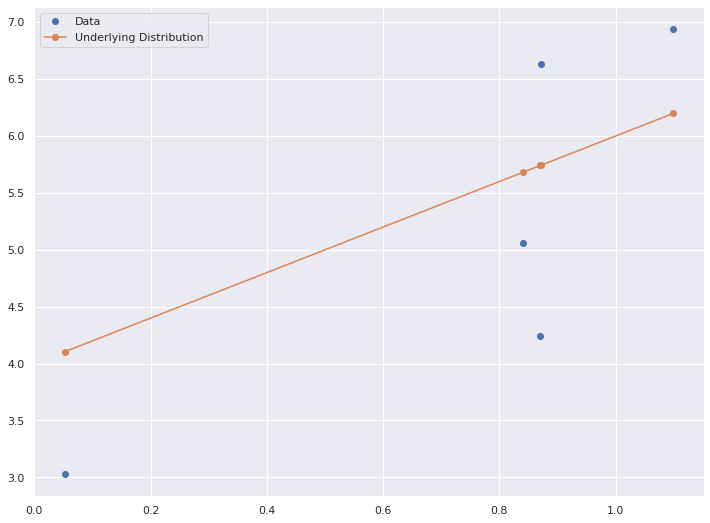

In [0]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

# prediction
yPred = np.dot(x, W)

In [0]:
W[0],W[1]

(array([2.67741212]), array([3.35314632]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

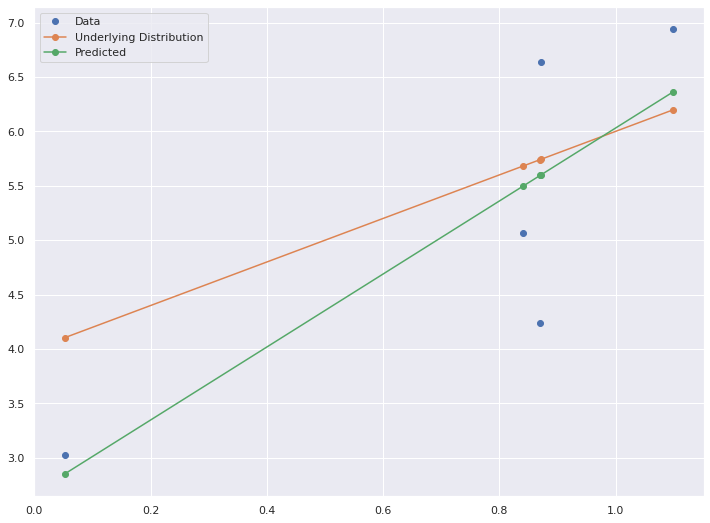

In [0]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  0.8321853483360432


### Complex Dependant Variable

It's complicated.

In [0]:
n = 20 # number of points
w = 3  # slope of line
b = 10 # y intercept of line
r = 2  # range of data on x-axis

np.random.seed(10)
X = xD = r * np.random.randn(n) # points also stored in xD (xData). will be useful later.
X.sort()
yPerf = X - 2 * (X ** 2) + 0.5 * (X ** 3)
np.random.seed(10)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 5, n) # imperfect world: we get noisy data

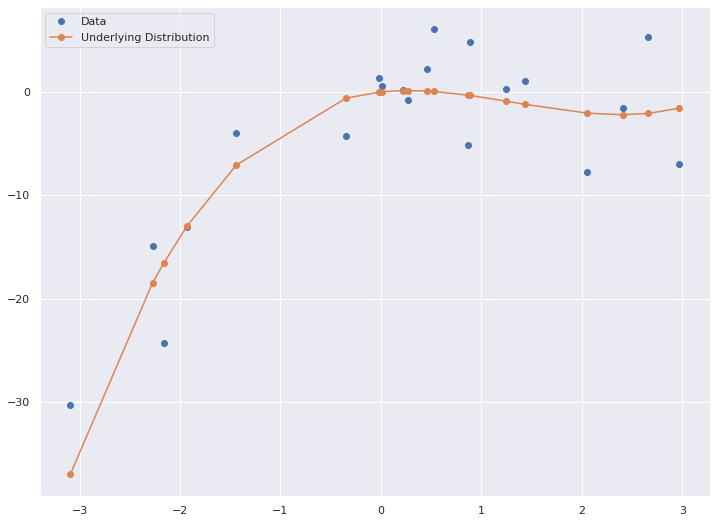

In [0]:
plt.plot(X, y, 'o', label='Data')
plt.plot(X, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
X = np.vstack((np.ones(np.shape(X)), X)).T
y = y.reshape(-1, 1)

In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPredLinear = yPred = np.dot(X, W)

W

array([[-5.45917353],
       [ 3.82202654]])

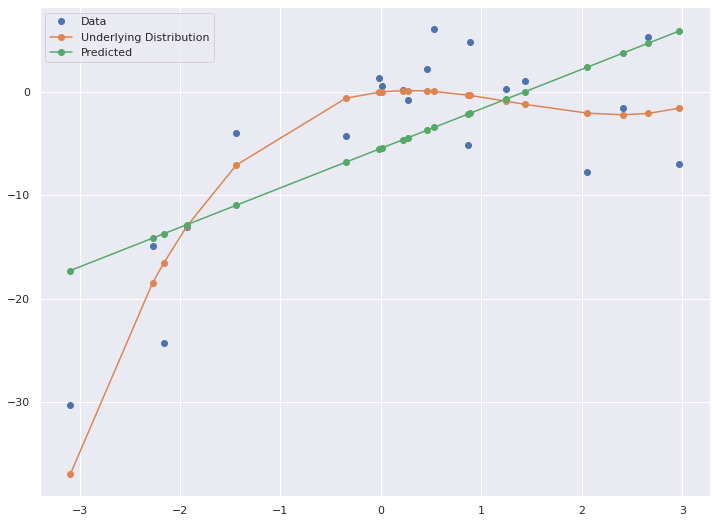

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  6.839531223681816


#### What to do next?

Can we add more features.

In [0]:
X = np.vstack((X.T, xD**2, xD**3)).T


In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred4Feature = yPred = np.dot(X, W)
W

array([[ 0.04177438],
       [ 2.58652514],
       [-1.87142105],
       [ 0.19655185]])

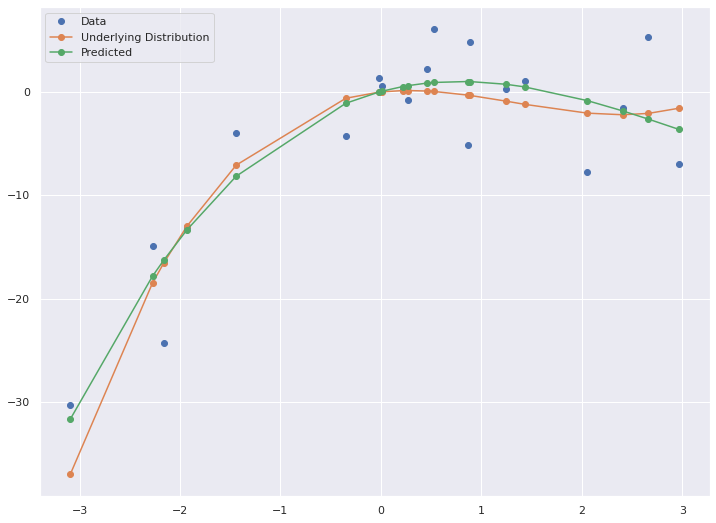

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.929493007090521


But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [0]:
X = np.vstack((X.T, xD**4, xD**5, xD**6, xD**7)).T

In [0]:
# analytical solution
W = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred8Feature = yPred = np.dot(X, W)


In [0]:
W

array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

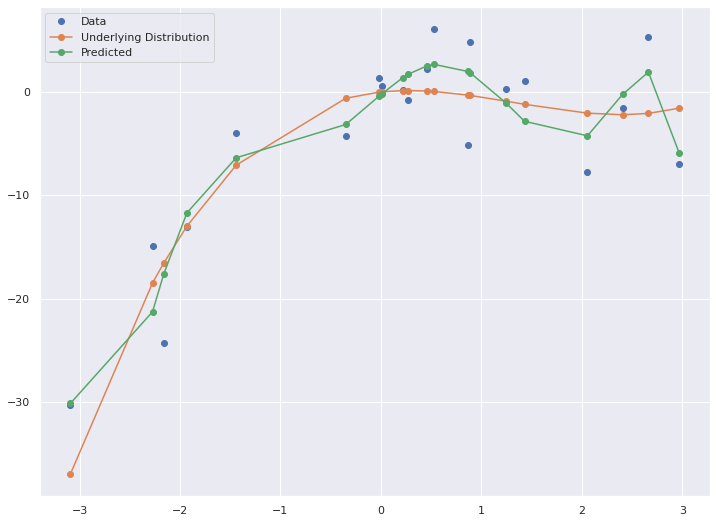

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.3097843019929725


Even though RMSE here (with much more higher features) is lower than previous case, we can see this Predicted Line is quite far from the Underlying distribution. This is called **Overfitting**.

When does the model overfits: when we have more features or comparitively less data for the model.

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

Options we have to prevent overfitting. Well there are many, most widely used ones are
- Using a validation set
- Regularization: add penalty on weights

In [0]:
λ = 10 # what is lambda: regularization parameter
f = 8 # number of features

In [0]:
# analytical solution
Warning = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y))

# prediction
yPred8FeatRegu = yPred = np.dot(X, W)
W


array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

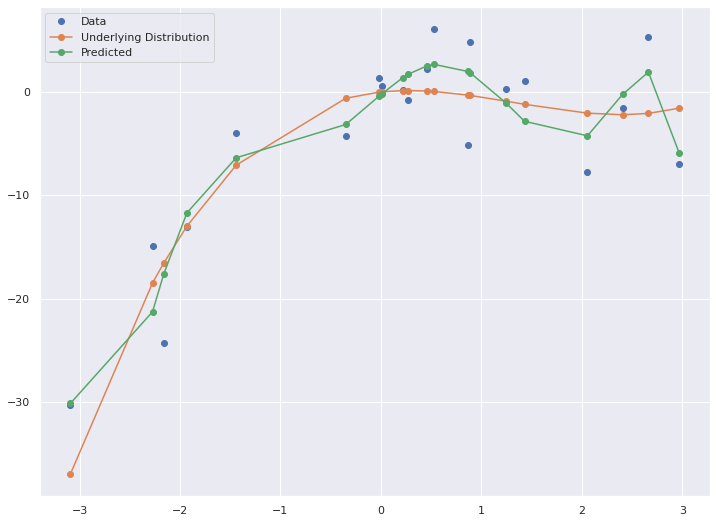

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

Can we know from the plot if the value of λ is optimal:

Somewhat but not exactly. 

To get the exact value of lambda you need to split dataset between training and testing. Then cycle over multiple values of lambda. The most optimum is the one which gives the lowest test error. 



All models together:

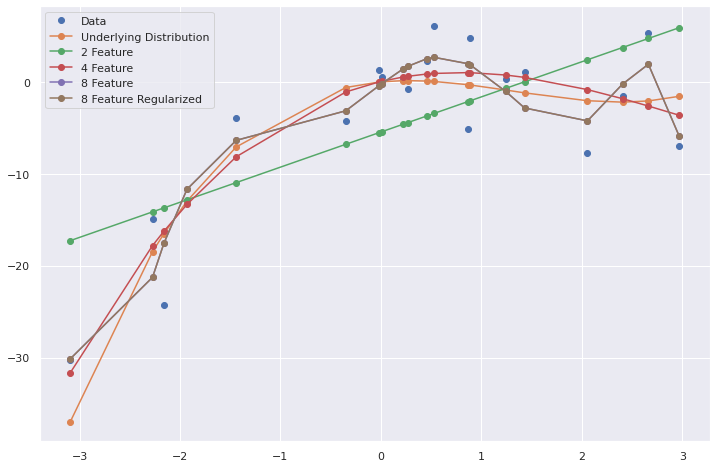

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPredLinear, 'o-', label='2 Feature')
plt.plot(xD, yPred4Feature, 'o-', label='4 Feature')
plt.plot(xD, yPred8Feature, 'o-', label='8 Feature')
plt.plot(xD, yPred8FeatRegu, 'o-', label='8 Feature Regularized')

plt.legend()
plt.show()

### Further Complex Multivariate Data

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. Three additional feature were added to this dataset using feature engineering.The objective is to predict the value of prices of the house using the given features. You can download the data by running the cell below.


In [0]:
df=pd.read_csv("https://raw.githubusercontent.com/Saket-Uoft/Data/master/data.csv")

In [0]:
# df.head()

In [0]:
df=df.drop(columns = 'Unnamed: 0')

In [0]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,New,New1,New2,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,20.31,0.0,13231.610,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,7.07,0.0,12038.120,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,7.07,0.0,7797.856,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,2.18,0.0,2790.959,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,2.18,0.0,4615.700,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,11.93,0.0,10642.180,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,11.93,0.0,12613.280,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,11.93,0.0,16513.740,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,11.93,0.0,16122.930,22.0


We can see that the target value is given by name by the name MEDV 

Are there any null values in the dataset?

In [0]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
New        0
New1       0
New2       0
MEDV       0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

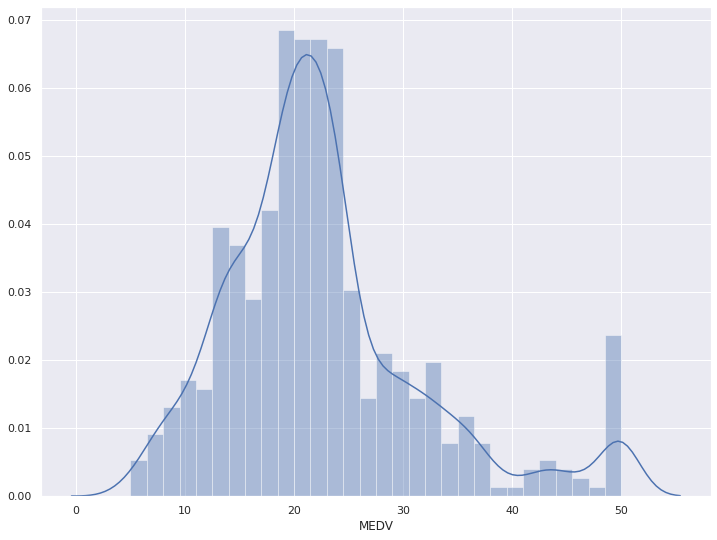

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Exercise

## Question 1 - Data Prepration

1. Normalize the data using StandardScaler from sklearn.
2. Split the multivariate data into training/validation data- 20% validation data, 80% training data (Note: While splitting use the value of random state=6)
3. Standardize the data.

In [0]:
X=df.drop('MEDV', axis=1)
y=df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6)

# Standardize the data
std = StandardScaler().fit(X_train)

X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)


## Question 2 - Direct Solution

Impelement the direct solution for linear regression on the dataset above and find best lambda.

1. Plot Train error and Validation error as a function of the lambda regularizer.
2. What is the best lambda where the best fit occurs? Use this best lambda from here on out. **The best value of lambda is 9. This means that the minima occurs at this point.**

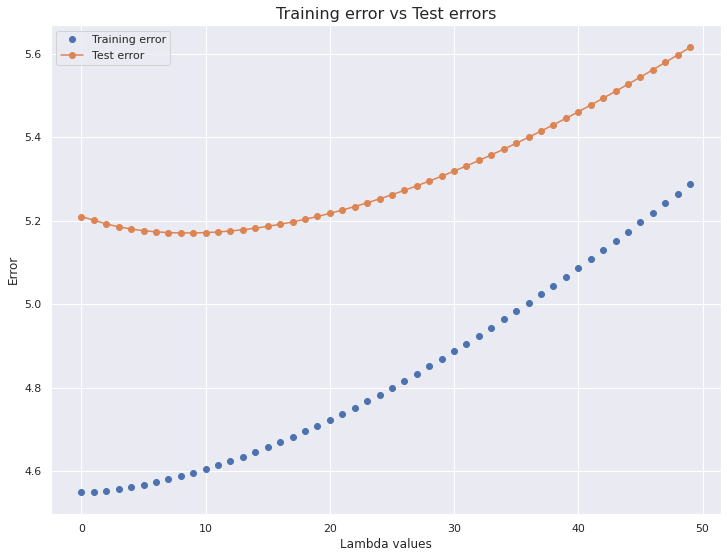

In [0]:
# Adding ones 
X_train_1 = np.hstack((np.ones(np.size(X_train_std,0)).reshape(-1,1), X_train_std))
X_test_1 = np.hstack((np.ones(np.size(X_test_std,0)).reshape(-1,1), X_test_std))


mse_train = []
mse_test = []
Weights=[]
f=17
for l in range(0,50): # Lambda values
  w = np.dot(np.linalg.inv(np.dot(X_train_1.T, X_train_1) + (l)*np.identity(f)), np.dot(X_train_1.T, y_train))
  yPred_train = np.dot(X_train_1, w)
  yPred_test = np.dot(X_test_1, w)
  mse_train.append(np.sqrt(mean_squared_error(yPred_train, y_train)))
  mse_test.append(np.sqrt(mean_squared_error(yPred_test, y_test)))
  Weights.append(w)
mse_train = np.asarray(mse_train)
mse_test = np.asarray(mse_test)
l_ar = np.arange(0,50)

plt.plot(l_ar, mse_train, 'o', label='Training error')
plt.plot(l_ar, mse_test, 'o-', label='Test error')
plt.title("Training error vs Test errors", fontsize = 16)
plt.xlabel("Lambda values")
plt.ylabel("Error")

plt.legend()
plt.show()



In [0]:
print("Best lambda value for training set: ", np.argmin(mse_train)) # The position of the minimum value is the value of lambda
print("Best lambda value for test set: ", np.argmin(mse_test))

Best lambda value for training set:  0
Best lambda value for test set:  9


In [0]:
len(Weights[1])

17

## Question 3 - Gradient Descent

1. Implement gradient descent (full-batch) for linear regression using a fixed learning rate $\alpha$ of 1e-2. You should compute the gradients yourself!

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the direct solution with the same lambda.

Minimum training error:  4.708514296944608
Minimum of test error:  5.109513136343585





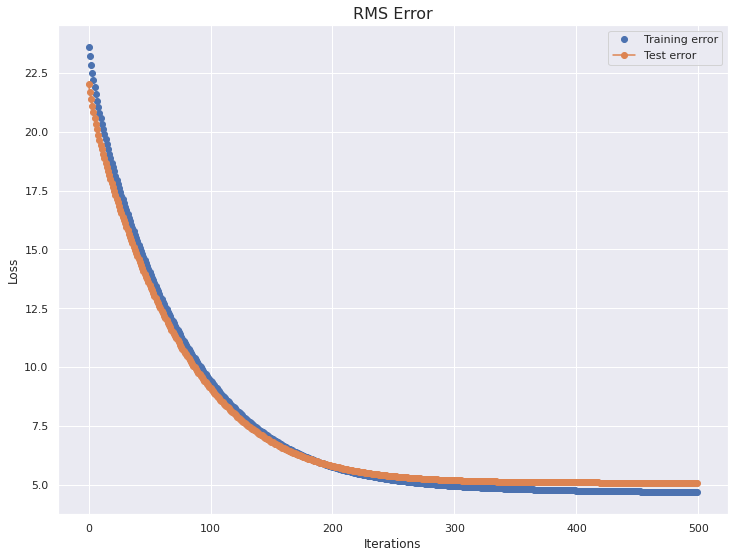

In [0]:
# Gradient descent
y_train = np.asarray(y_train).reshape(-1,1)

def gradient_descent(X,y,lr,epochs, l): # l = Lambda
  mse_graddesc_train = []
  mse_graddesc_test = []
  np.random.seed(0)
  w_rand = np.random.randn(17, 1)

  for i in range(0,epochs):
    ypredgrad_train = np.dot(X_train_1,w_rand)
    ypredgrad_test = np.dot(X_test_1, w_rand)
    w_rand = w_rand - lr*(1/len(y_train))*(np.dot(X_train_1.T, (ypredgrad_train-y_train)) + (l*w_rand))
    
    mse_graddesc_train.append(np.sqrt(mean_squared_error(ypredgrad_train, y_train)))
    mse_graddesc_test.append(np.sqrt(mean_squared_error(ypredgrad_test, y_test)))
  

  return w_rand, mse_graddesc_train, mse_graddesc_test

w_graddesc, msegd_train, msegd_test = gradient_descent(X_train_1, y_train, lr=0.01, epochs=500, l=9)
# print(mseq3)

print("Minimum training error: ", min(msegd_train))
print("Minimum of test error: ", min(msegd_test))
print("\n\n")
plt.plot(range(500), msegd_train, 'o', label="Training error")
plt.plot(range(500), msegd_test, 'o-', label="Test error")
plt.title("RMS Error", fontsize=16)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

In [0]:
# Analytical solution with lambda = 9
f = 17
l = 9
w = np.dot(np.linalg.inv(np.dot(X_train_1.T, X_train_1) + (l)*np.identity(f)), np.dot(X_train_1.T, y_train))

ypred_train = np.dot(X_train_1,w)
ypred_test = np.dot(X_test_1, w)

train_err = np.sqrt(mean_squared_error(ypred_train, y_train))
test_err = np.sqrt(mean_squared_error(ypred_test, y_test))

print("Training error of analytical solution: ", train_err)
print("Test error of analytical solution: ", test_err)


Training error of analytical solution:  4.596442587142813
Test error of analytical solution:  5.170866688856866


In [0]:
#Validation error comparison
print("Test error of analytical solution: ", test_err)
print("Test error derived from gradient descent: ", min(msegd_test))
print("\n\n")
#comparison of analytical w with gradient descent w

for i in range(np.size(X_train_1, 1)):
  perc = (w[i,0]-w_graddesc[i,0])
  print("Difference in values", abs(perc))

Test error of analytical solution:  5.170866688856866
Test error derived from gradient descent:  5.109513136343585



Difference in values 0.12032951342493092
Difference in values 0.2834324284314667
Difference in values 0.36526351089127673
Difference in values 0.4648372365418198
Difference in values 0.6384709364447911
Difference in values 0.32274272495199674
Difference in values 0.6558698062396355
Difference in values 0.2530175110508533
Difference in values 0.8225487085673788
Difference in values 1.3489127854454748
Difference in values 0.8830962509360085
Difference in values 0.1616665782090625
Difference in values 0.09892219410525671
Difference in values 0.43247658835036606
Difference in values 0.6874961904605121
Difference in values 0.5615446875823542
Difference in values 0.21043309632954277


**We can see that the validation error of direct solution and that derived from gradient descent model is almost the same.**
**Even the weights are almost the same for the solutions (the difference in the weights are shown which are very small and near to 0).**

## Question 4 - Mini-batch size and learning rate

1- Impelement Mini-batch Gradient Descent.

2- Sweep different values for the batch size with a fixed learning rate and report your findings on a plot (Training Error, Test Error,...).

3- Select the best batch sized based on fastest convergence (number of times you update the weights) and sweep the learning rate. Report your findings on a plot.
**Batch size of 64 is converging the fastest and learning rate of 0.01 is the most desirable rate.**


In [0]:
#fuunction to create batches

def batch(X_train4,y_train4,batch_size):
  batch_X = []
  batch_y = []
  i=-1
  for j in range(int(len(X_train4)/batch_size)):
    tempx = []
    tempy = []
    for k in range(batch_size):
      i=i+1
      tempx.append(X_train4[i])
      tempy.append(y_train4[i])
    batch_X.append(tempx)
    batch_y.append(tempy)

  if int(len(X_train4) % batch_size) != 0: # For the remaining data in the training set 
    for q in range(1):
      tempx = []
      tempy = []
      for m in range(int(len(X_train4) % batch_size)):
        i=i+1
        tempx.append(X_train4[i])
        tempy.append(y_train4[i])
      batch_X.append(tempx)
      batch_y.append(tempy)

  return batch_X,batch_y

In [0]:
# function for gradient descent

def batch_grad_desc (X, y, X_test, y_test, batch_size, lr, epoch=500, l = 9):
  
  np.random.seed(0)
  w_rand4 = np.random.randn(17, 1) 
  mse_graddesc4 = []
  mse_gradepoch = []
  test_mse_gd = []
  test_mse_gradepoch = []
  batchtime = []
        
  for i in range (epoch): # Shuffling the contents of the entire training set so that the contents of batches changes every time
    #randomizing data
    data4 = np.hstack((X,y))
    rand_traindata4 = np.random.permutation(data4)
    X_train4 = np.delete(rand_traindata4,17,1) #1 means delete along column axis
    y_train4 = rand_traindata4[:,17]
    batch_X, batch_y = batch(X_train4,y_train4,batch_size)

    start = time.time()
    #gradient descent
    for n in range(len(batch_X)):
      # start = time.time()
      ypredgrad4 = np.dot(np.asarray(batch_X[n]),w_rand4)
      w_rand4 = w_rand4 - lr*(1/len(batch_y[n]))*(np.dot(np.asarray(batch_X[n]).T, (ypredgrad4-np.asarray(batch_y[n]).reshape(-1,1)))+(l*w_rand4))

      ypred4 = np.dot(X_train4,w_rand4)
      test_ypred = np.dot(X_test, w_rand4)

      mse_graddesc4.append(np.sqrt(mean_squared_error(ypred4, y_train4)))
      test_mse_gd.append(np.sqrt(mean_squared_error(test_ypred, y_test)))

    stop = time.time()
    timedif = stop - start
    batchtime.append(timedif)
    ypred4epoch = np.dot(X_train4,w_rand4)
    test_ypredepoch = np.dot(X_test, w_rand4)

    mse_gradepoch.append(np.sqrt(mean_squared_error(ypred4epoch, y_train4)))
    test_mse_gradepoch.append(np.sqrt(mean_squared_error(test_ypredepoch, y_test)))

  return mse_graddesc4, mse_gradepoch, test_mse_gd, test_mse_gradepoch, batchtime

In [0]:
total_mse4 = []
total_test_mse = []
total_mse4epoch = []
total_test_mseepoch = []
total_time = []

for mb in [1, 4, 16, 64, 128, 256, 404]: # Batch sizes
  mse4, mseepoch4, test_mse, test_mseepoch, batchtime = batch_grad_desc(X_train_1,y_train, X_test_1, y_test, lr=0.01, batch_size = mb)
  total_mse4.append(mse4)
  total_test_mse.append(test_mse)
  total_mse4epoch.append(mseepoch4)
  total_test_mseepoch.append(test_mseepoch)
  total_time.append(batchtime)

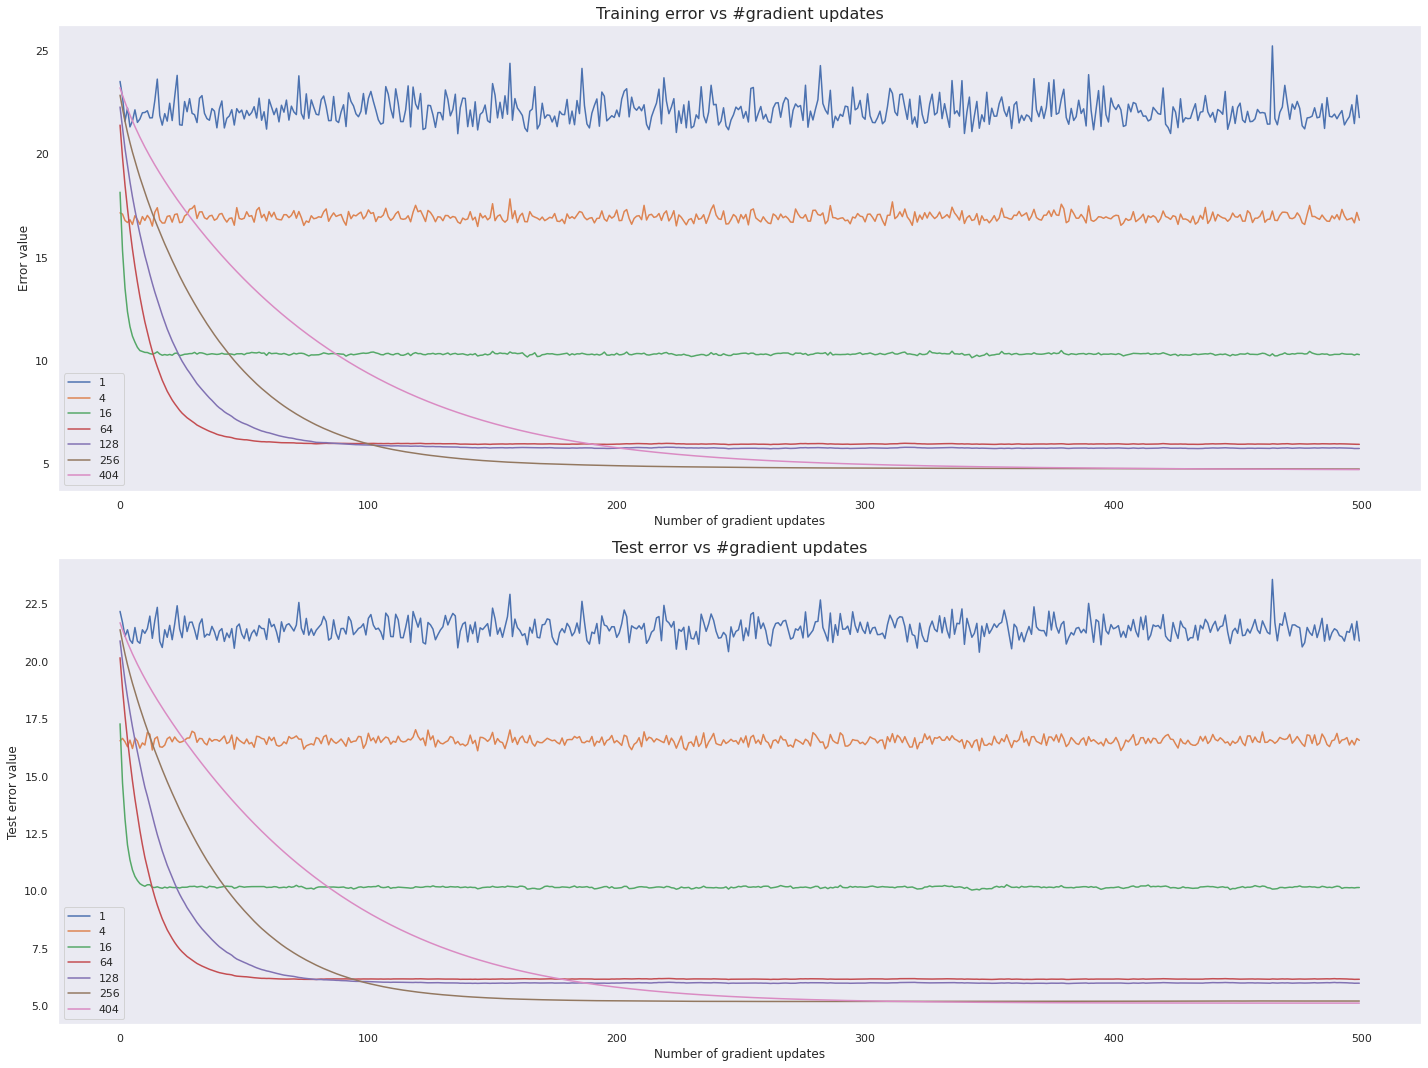

In [0]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(20,15))
key = ['1', '4', '16','64', '128','256','404']

#Plotting training error vs gradient updates
for i in range(len(total_mse4epoch)):
  ax1.plot(total_mse4epoch[i], label=key[i])
ax1.legend()
ax1.set_title('Training error vs #gradient updates',fontsize=16)
ax1.set_xlabel('Number of gradient updates')
ax1.set_ylabel('Error value')
ax1.grid()

#Plotting test error vs gradient updates
for i in range(len(total_test_mseepoch)):
  ax2.plot(total_test_mseepoch[i], label=key[i])
ax2.legend()
ax2.set_title('Test error vs #gradient updates',fontsize=16)
ax2.set_xlabel('Number of gradient updates')
ax2.set_ylabel('Test error value')
ax2.grid()

plt.tight_layout()

**From the above graph, we can see that the graph for batch size 16 converges fast but is quite unstable. The next to converge faster is batch size 64 and the graph is also smooth.**
**Hence, we will proceed with the batch size of 64.**

In [0]:
for i in range(7):
  print("Training error at convergence for batch size ", key[i] , "is", min(total_mse4epoch[i]))
print("\n")
for i in range(7):
  print("Test error at convergence for batch size ", key[i] , "is", min(total_test_mseepoch[i]))

Training error at convergence for batch size  1 is 20.971314065964428
Training error at convergence for batch size  4 is 16.47896922060857
Training error at convergence for batch size  16 is 10.125147856465855
Training error at convergence for batch size  64 is 5.916147686732229
Training error at convergence for batch size  128 is 5.715663521786931
Training error at convergence for batch size  256 is 4.735961285972408
Training error at convergence for batch size  404 is 4.708084941931348


Test error at convergence for batch size  1 is 20.39614054209982
Test error at convergence for batch size  4 is 16.101739303841452
Test error at convergence for batch size  16 is 10.035142116827444
Test error at convergence for batch size  64 is 6.139446633513473
Test error at convergence for batch size  128 is 5.962622620833723
Test error at convergence for batch size  256 is 5.179345441497992
Test error at convergence for batch size  404 is 5.109513136343584


**The mini batch with size 64 converges faster but at a higher error value. As the validation error derived from the gradient descent model and the direct solution is 5.17, the error of our mini batch lies within +2% at 6.13 (as shown above). The error might be a bit high (at +2%) but it also the one to converge faster.  Hence, we can select the mini batch with size 64.**

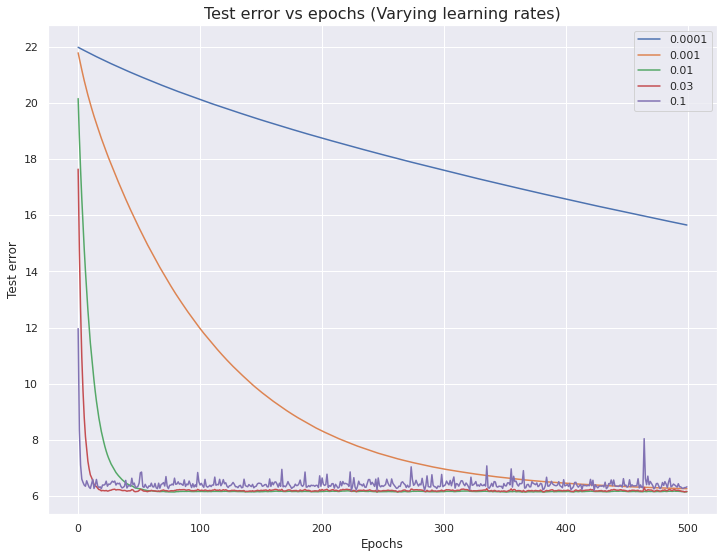

In [0]:
# Batch size = 64 and varying learning rates

lrate = np.array([0.0001, 0.001, 0.01, 0.03, 0.1]) # and 0.05 (removed for better comparison from the graphs)
test=[]
for rate in lrate: # Re-using the code developed above
  mse_tr, trgep, mse_te, tegep, batchtime = batch_grad_desc (X_train_1, y_train, X_test_1, y_test, batch_size = 64, lr=rate, epoch=500, l = 9)
  test.append(tegep)

for i in range(len(lrate)):
  plt.plot(test[i], label = lrate[i])
plt.title("Test error vs epochs (Varying learning rates)", fontsize = 16)
plt.xlabel("Epochs")
plt.ylabel("Test error")
plt.legend()
plt.show()

**From the above graph, we can see that the plot for learning rate of 0.1 and 0.03 arethe fastest, but they are unstable and have lots of variations. On the other hand, learning rate of 0.01 is the most stable amongst the 3 fastest plots. Hence, learning rate of 0.01 is suitable in this case.**

## Question 5 - Adaptive Learning rate

Impelement an adaptive learning rate scheme where you start a mini-batch gradient descent with a large learning rate and decrease the learning rate while you are getting closer to the local minima. 

**This can be done in multiple ways. I have provided 2 methods, one where the learning rate changes after every 10 epochs, and another where the learning rate changes after every epoch (You may have to uncomment that part of the code to check).**

In [0]:
def alr_grad_desc (X, y, X_test, y_test, batch_size, lr, epoch, l = 9):
  
  np.random.seed(0)
  w_rand4 = np.random.randn(17, 1) 
  # mse_graddesc4 = []
  mse_gradepoch = []
  # test_mse_gd = []
  test_mse_gradepoch = []
  ad_lr = []
        
  for i in range (epoch): # Shuffling the contents of the entire training set so that the contents of batches changes every time
    #randomizing data
    data4 = np.hstack((X,y))
    rand_traindata4 = np.random.permutation(data4)
    X_train4 = np.delete(rand_traindata4,17,1) #1 means delete along column axis
    y_train4 = rand_traindata4[:,17]
    batch_X, batch_y = batch(X_train4,y_train4,batch_size)


# Below are 2 methods for adaptive learning. Use any one to check for yourself. 


    # if (i % 10) == 0:       # 1. Decrease the learning rate after every 10 epochs.
    #   lr = lr/(1+lr)

    #lr = lr/(1+(lr**2))       # 2. This can also be used where the learning rate changes after each epoch but at a much slower rate. 


    lr = lr/(1+lr)            # 3. Here, the learning rate reduces at a much faster rate than the 2nd function.

    #gradient descent
    for n in range(len(batch_X)):
      ypredgrad4 = np.dot(np.asarray(batch_X[n]),w_rand4)
      w_rand4 = w_rand4 - lr*(1/len(batch_y[n]))*(np.dot(np.asarray(batch_X[n]).T, (ypredgrad4-np.asarray(batch_y[n]).reshape(-1,1)))+(l*w_rand4))

      ypred4 = np.dot(X_train4,w_rand4)
      test_ypred = np.dot(X_test, w_rand4)

    ypred4epoch = np.dot(X_train4,w_rand4)
    test_ypredepoch = np.dot(X_test, w_rand4)
    ad_lr.append(lr) # Value of learning rate stored every epoch
    mse_gradepoch.append(np.sqrt(mean_squared_error(ypred4epoch, y_train4)))
    test_mse_gradepoch.append(np.sqrt(mean_squared_error(test_ypredepoch, y_test)))

  return mse_gradepoch, test_mse_gradepoch, ad_lr

alr_tmse = []
alr_lr = []

alr_train_mse, alr_test_mse, ad_lr = alr_grad_desc (X_train_1, y_train, X_test_1, y_test, batch_size = 64, lr=0.05, epoch=200, l = 9)
alr_tmse.append(alr_test_mse)
alr_lr.append(ad_lr)

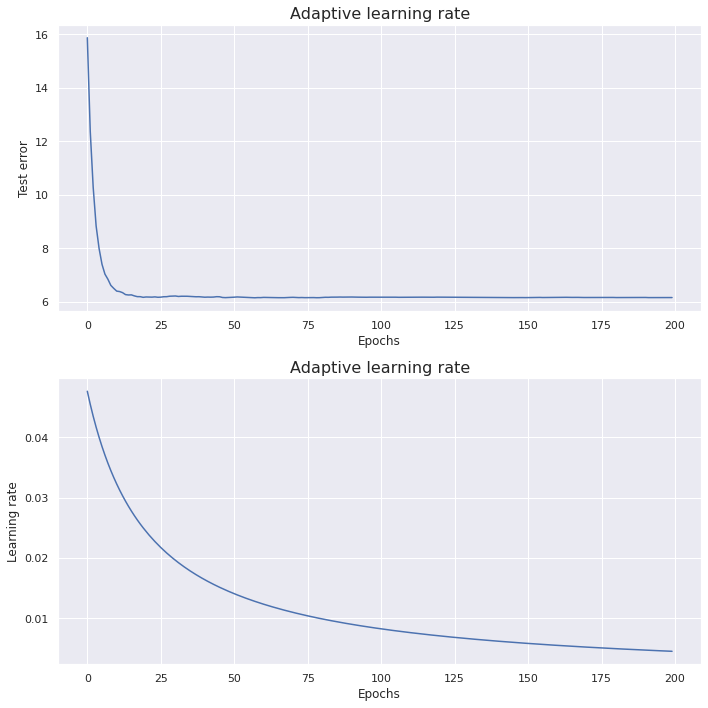

In [0]:
fig, (ax1,ax2)=plt.subplots(2,1, figsize=(10,10))

ax1.plot(alr_test_mse)
ax1.set_title("Adaptive learning rate", fontsize=16)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Test error")
plt.grid()

ax2.plot(ad_lr)
ax2.set_title("Adaptive learning rate", fontsize=16)
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Learning rate")
plt.grid()
plt.tight_layout()

In [0]:
alr_test_mse[-1]

6.15033236268189

**We can observe that the test error gets closer to the error which we got in the previous question for the same batch size of 64 (6.139446633513473).**
**If we increase the number of epochs, the error might go to 0.**

## Question 6 - Fastest Solution!
Less training time, more faster!

So far, you learned alot about gradient descent. 
Now consider you are an Machine learning expert working for a huge corporation. One of the most important things you will face as an ML expert is to train and develope your models as fast & accurate as possible.

 In this part we want to find a mini-batch size and a learning rate adjustment scheme to train the model quickly. Use the Python time library to measure the training time (time you spend to find the weights). Repeat every case at least 10 times and report the average time (the machine that is running your code is also performing other tasks, averaging time will help you to have a better judgment about the performance of your model). You should train your model until the loss of the model on the test set is close to direct solution with $\pm 1\%$ error. 

 Elaborate your findings with help of tables/plots.

 Report your Best time, and Accuracy!

In [0]:
def test123 (X, y, X_test, y_test, batch_size, lr, l = 9):
  
  np.random.seed(0)
  w_rand4 = np.random.randn(17, 1) 
  mse_graddesc4 = []
  mse_gradepoch = []
  test_mse_gd = []
  test_mse_gradepoch = []
  batchtime = []
  acc=[]
  
  error=50
  v=0
  
  while error > test_err*1.01:   # 1% of error derived from direct solution 

    # randomizing data
    data4 = np.hstack((X,y))
    rand_traindata4 = np.random.permutation(data4)
    X_train4 = np.delete(rand_traindata4,17,1) #1 means delete along column axis
    y_train4 = rand_traindata4[:,17]
    batch_X, batch_y = batch(X_train4,y_train4,batch_size)

    start = time.time()   # Calculating time for each epoch and adding them later
    #gradient descent
    for n in range(len(batch_X)):
      # start = time.time()
      ypredgrad4 = np.dot(np.asarray(batch_X[n]),w_rand4)
      w_rand4 = w_rand4 - lr*(1/len(batch_y[n]))*(np.dot(np.asarray(batch_X[n]).T, (ypredgrad4-np.asarray(batch_y[n]).reshape(-1,1)))+(l*w_rand4))

      ypred4 = np.dot(X_train4,w_rand4)
      test_ypred = np.dot(X_test, w_rand4)

    stop = time.time()
    timedif = stop - start
    batchtime.append(timedif)

    ypred4epoch = np.dot(X_train4,w_rand4)
    test_ypredepoch = np.dot(X_test, w_rand4)

    mse_gradepoch.append(np.sqrt(mean_squared_error(ypred4epoch, y_train4)))
    test_mse_gradepoch.append(np.sqrt(mean_squared_error(test_ypredepoch, y_test)))

    error = np.sqrt(mean_squared_error(test_ypredepoch, y_test))
    acc.append(100 - mean_squared_error(test_ypredepoch, y_test))
    v+=1
    if v==2000:     # Limitimg the while loop to only 2000 iterations (needed for smaller batch sizes as they never converge at the desired error)
      break

  return mse_graddesc4, mse_gradepoch, test_mse_gd, test_mse_gradepoch, batchtime, acc

In [0]:
total_mse4 = []
total_test_mse = []
total_mse4epoch = []
total_test_mseepoch = []
total_time = []
accuracy=[]

for mb in [202, 256, 404]: # Batch sizes
  mse4, mseepoch4, test_mse, test_mseepoch, batchtime, acc = test123(X_train_1,y_train, X_test_1, y_test, lr=0.25, batch_size = mb)
  total_mse4.append(mse4)
  total_test_mse.append(test_mse)
  total_mse4epoch.append(mseepoch4)
  total_test_mseepoch.append(test_mseepoch)
  total_time.append(batchtime)
  accuracy.append(acc)

In [0]:
key = ['202', '256', '404']
df6 = []

for i in range(len(key)):
  dic = {}
  dic['Batch size'] = key[i]
  dic['Time'] = np.sum(total_time[i]) # Sum of time taken by each epoch
  dic['Test error'] = min(total_test_mseepoch[i])
  dic['Error difference (in %)'] = ((min(total_test_mseepoch[i])/test_err)-1)*100
  dic['Accuracy (%)'] = accuracy[i][-1]
  df6.append(dic)

df6 = pd.DataFrame(df6)

In [0]:
df6

,Batch size,Time,Test error,Error difference (in %),Accuracy (%)
0,202,0.003522,5.160157,-0.207110,73.372777
1,256,0.002726,5.195478,0.475953,73.007012
2,404,0.003887,5.213371,0.821991,72.820765


Batch size 256 takes the least amount of time followed by batch size 202 to reach the desired error.

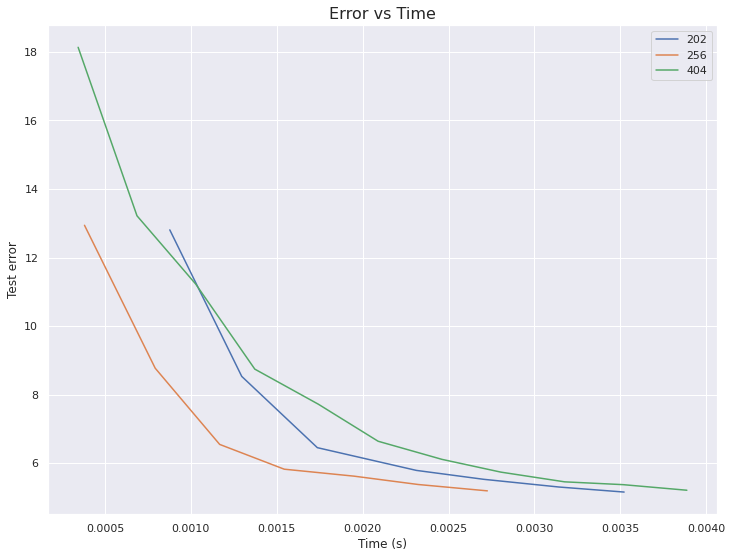

In [0]:

for i in range(len(total_time)):
  plt.plot(np.cumsum(np.array(total_time[i])), total_test_mseepoch[i], label = key[i])
plt.title("Error vs Time", fontsize=16)
plt.xlabel("Time (s)")
plt.ylabel("Test error")
plt.legend()
plt.show()

**Batch size 256 converges the fastest taking 0.003187 seconds.**

**Accuracy for continuous data is 100 minus the mean squared error loss of the model. Hence, the accuracy of the batch size 202 is the highest. The accuracy is 73.37% at 1% deviation of the error derived by the direct solution (which is calculated by taking the root mean square value).** 

**Batch sizes 1, 16, 64 and 128 were also chosen but at the learning rate of 0.25, the error overshoots the minima and error becomes very huge, giving me an error after certain epochs (Hence removed). To prevent the model from failing, the maximum iterations were limited to 2000 as the small batch sizes do not arrive at the desired test error.**

## References

https://datascience.stackexchange.com/questions/10188/why-do-cost-functions-use-the-square-error

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

